## Minard's Visualization Of Napoleon's 1812 March

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

cities = pd.read_csv('C:/Users/hemak/Downloads/Visualization/Data/minard-cities.csv')
troops = pd.read_csv('C:/Users/hemak/Downloads/Visualization/Data/minard-troops.csv')
weather = pd.read_csv('C:/Users/hemak/Downloads/Visualization/Data/minard-temp.csv')
cities.head()
named_city = cities[cities['city'].notna()]
named_city.reset_index(inplace=True,drop=True)

In [2]:
named_city

,long,lat,survivors,direction,group,city
0,24.0,54.9,340000,Advance,1,Kowno
1,26.0,54.7,320000,Advance,1,Smorgoni
2,28.0,54.9,280000,Advance,1,Gloubokoe
3,28.5,55.0,240000,Advance,1,Polotzk
4,30.3,55.3,175000,Advance,1,Witebsk
5,34.4,55.5,127100,Advance,1,Chjat
6,37.6,55.8,100000,Advance,1,Moscou
7,37.7,55.7,100000,Retreat,1,Moscou
8,36.8,55.0,96000,Retreat,1,Mojaisk
9,33.3,54.8,37000,Retreat,1,Dorogobouge


## Recreating Minard's path of Napolean's army in Russia using a map 

In [3]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
import branca.colormap as cm
center_lat = sum(named_city['lat']) / len(named_city['lat'])
center_lon = sum(named_city['long']) / len(named_city['long'])

m = folium.Map(location=[center_lat, center_lon], zoom_start=6)
for i in range(len(named_city['long']) - 1):
    if named_city['direction'][i]=='Advance':
        folium.PolyLine(locations=[(named_city['lat'][i], named_city['long'][i]), 
                         (named_city['lat'][i + 1], named_city['long'][i + 1])],
                       color='#FF9900',weight=named_city['survivors'][i]/10000).add_to(m)
    else:
        folium.PolyLine(locations=[(named_city['lat'][i], named_city['long'][i]), 
                         (named_city['lat'][i + 1], named_city['long'][i + 1])],
                       color='#000000',weight=named_city['survivors'][i]/10000).add_to(m)

display(m)

### Minard's chart is redesigned with the number of survivors visualized in the form of bubbles, as I read through multiple articles, I felt that the width and the number of survivors are not evidently explainable to the audience. With the tootip and the bubble being an understandable structure, the below plot does justice to the story.

In [4]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
from folium.features import DivIcon
import branca.colormap as cm
center_lat = sum(named_city['lat']) / len(named_city['lat'])
center_lon = sum(named_city['long']) / len(named_city['long'])

m = folium.Map(location=[center_lat, center_lon], zoom_start=6.2)
for i in range(len(named_city['long']) - 1):
    if named_city['direction'][i]=='Advance':
        folium.PolyLine(locations=[(named_city['lat'][i], named_city['long'][i]), 
                         (named_city['lat'][i + 1], named_city['long'][i + 1])],
                       color='#FF9900',weight=8).add_to(m)
    else:
        folium.PolyLine(locations=[(named_city['lat'][i], named_city['long'][i]), 
                         (named_city['lat'][i + 1], named_city['long'][i + 1])],
                       color='#000000',weight=8).add_to(m)
for lat, lon, strength,city in zip(named_city['lat'], named_city['long'], named_city['survivors'],named_city['city']):
    tool="City : "+city+" Survivors : "+str(strength)
    folium.CircleMarker([lat, lon], radius=strength/10000, color='yellow', fill=True, fill_color='blue', fill_opacity=0.2,tooltip=str(tool)).add_to(m)
    folium.map.Marker([lat, lon],
                      icon=DivIcon(
                          icon_size=(30,30),
                          icon_anchor=(5,14),
                          html=f'<div style="font-size: 10pt">%s</div>' % str(city),
                      )
                     ).add_to(m)
    #folium.Marker([lat, lon], popup='Mt. Hood Meadows').add_to(m)
heat_data = list(zip(weather['long'], weather['temp']))
HeatMap(heat_data, gradient={-20: 'blue', 0: 'green', -40: 'yellow'}).add_to(m)

display(m)

## Analysing the attrition of the survivors in a simpler visualization

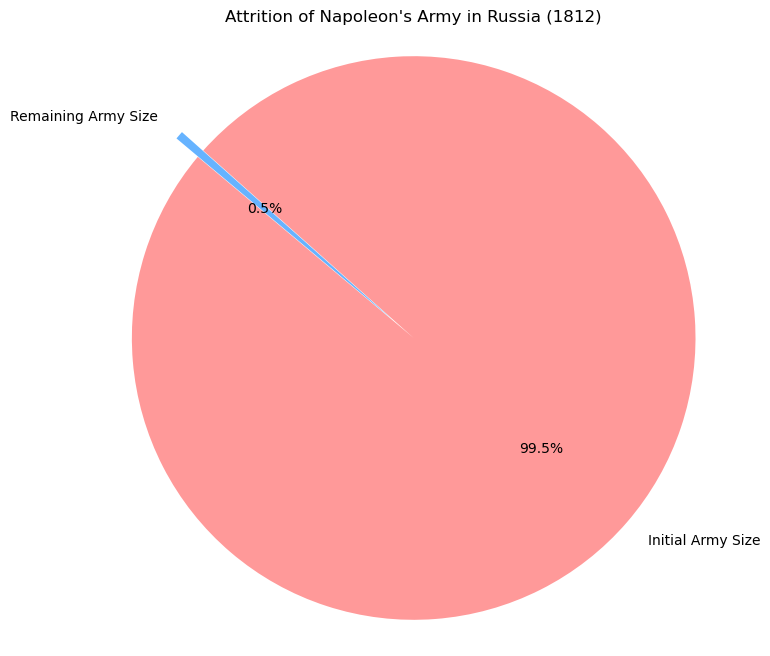

In [5]:
import matplotlib.pyplot as plt

# Data for the visualization
labels = ['Initial Army Size', 'Remaining Army Size']
sizes = [422000, 2000]  # Army sizes at respective points (start and end)
colors = ['#ff9999','#66b3ff']  # Colors for the pie chart
explode = (0.1, 0)  # Explode the first slice (initial army size) for emphasis

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
ax.set_title('Attrition of Napoleon\'s Army in Russia (1812)')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


In [6]:
weather_up=pd.merge(weather,named_city,how='left',on='long').dropna()

In [7]:
weather_up

,long,temp,days,date,lat,survivors,direction,group,city
0,37.6,0,6,Oct18,55.8,100000.0,Advance,1.0,Moscou
3,32.0,-21,5,Nov14,54.6,24000.0,Retreat,1.0,Smolensk
5,28.5,-20,4,Nov28,55.0,240000.0,Advance,1.0,Polotzk
6,28.5,-20,4,Nov28,54.2,20000.0,Retreat,1.0,Studienska


In [8]:
weather=weather.sort_values('days')
weather

,long,temp,days,date
8,25.3,-26,1,Dec07
6,27.2,-24,3,Dec01
5,28.5,-20,4,Nov28
3,32.0,-21,5,Nov14
7,26.7,-30,5,Dec06
0,37.6,0,6,Oct18
1,36.0,0,6,Oct24
4,29.2,-11,10,NaN
2,33.2,-9,16,Nov09


## Temperature during Napoleon's 1812 Russian Campaign with the available data

###  Re-visioned to link temperature information directly to the path and strength of Napoleon’s army, was unable to recreate it with the availabe data.

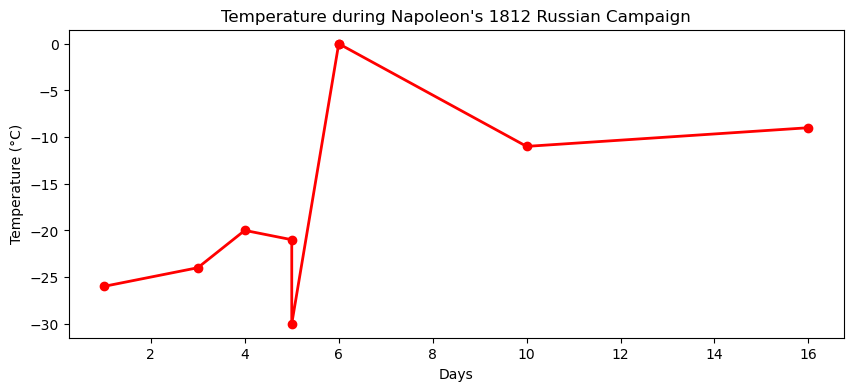

In [9]:
import matplotlib.pyplot as plt

# Data for temperature
days = weather['days']
temperature = weather['temp']

plt.figure(figsize=(10, 4))
plt.plot(days, temperature, marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.title('Temperature during Napoleon\'s 1812 Russian Campaign')
#plt.grid(True)
plt.show()
